In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
def getOverallAge(birthDates):
    birthYears = []
    for i in birthDates:
        birthYears.append(int(i.split("-")[0]))
    return sum(birthYears) / len(birthYears)


data = pd.read_csv("../data/integrated.csv")

label = "playoff"
df = data
#df['confID'].value_counts()

#df.drop(['pos', 'college'], axis=1, inplace=True)

years = df['year'].unique()
teams = df['tmID'].unique()

for element in ["round", "series", "tmIDWinner", "tmIDLoser", "W_series", "L_series"]:
    df.drop(element, axis=1, inplace=True)
    
counter = 0
new_df = pd.DataFrame()
for year in years:
    for team in teams:
        small_df = df[(df['tmID'] == team) & (df['year'] == year)]
        if small_df.empty:
            continue
        d = pd.DataFrame([small_df.iloc[0]])
        d.fillna(0, inplace=True)
        d['award_player'] = (small_df['award_player'].count())
        d['award_coach'] = d['award_coach'].apply(lambda x: 1 if x != 0 else 0)
        d['CBE_Sum'] = (small_df['CBE_Sum'].mean())
        d['height'] = (small_df['height'].mean())
        d['weight'] = (small_df['weight'].mean())
        d['playersAge'] = (2000 + df['year']) - getOverallAge(small_df['birthDate'])
        d.drop('playerID', axis=1, inplace=True)
        d.drop('birthDate', axis=1, inplace=True)

        new_df = pd.concat([new_df, d])
        counter += 1

df = new_df
df.sort_values(by=['year', 'tmID'], inplace=True)

if not os.path.exists('data/clean'):
    os.makedirs('data/clean')

df.to_csv('data/clean/miguel.csv', index=False)


In [4]:
df.shape

(122, 66)

In [5]:
mapping = {'L': 'Y',
           'W': 'Y'}

df['semis'] = df['semis'].map(mapping)
df['finals'] = df['finals'].map(mapping)
df['firstRound'] = df['firstRound'].map(mapping)


In [6]:
features = df.columns

#X = df[features]
#df = X

In [7]:
le = LabelEncoder()
y = le.fit_transform(df['playoff'])
for x in df.columns:
    df[x] = le.fit_transform(df[x])
print(df.iloc[0].values)

[ 0  1  0  0  1  0  7  1  1  1  1  1 38 29 23 22 27 28 26 15 11 60 73 12
 41  7 34 65 38 74 79 23 38 38 24 30 82 13 31  3 31 81  4 19  0  3 11  2
 10  3 13  3  3  4 13  0  5 22  0  0 40 13 29  0  0 47]


In [8]:
initial = df.columns
available_columns = list(features)
available_columns.remove("playoff")
key_predictors = []
features_values = pd.DataFrame(df, columns=available_columns)
target_values = df["playoff"].values
chi2_results = chi2(features_values, target_values)
best_chi2_cols = SelectKBest(chi2, k=33)

# , c


key_features = ["playoff", "year", 'confID']

best_chi2_cols.fit(features_values, target_values)

best_chi2_features = features_values.columns[best_chi2_cols.get_support()]
for k in (best_chi2_features):
    key_predictors.append(k)

for ft in key_features:
    if ft not in key_predictors:
        key_predictors.append(ft)
df = df[key_predictors]
key_predictors = list(df.columns)
print(df.shape)

print("Removed: ", set(initial) - set(df.columns))

(122, 36)
Removed:  {'d_3pm', 'd_ftm', 'd_asts', 'o_to', 'name', 'homeL', 'd_stl', 'o_stl', 'coachID', 'finals', 'd_pf', 'franchID', 'd_fgm', 'GP', 'tmID', 'height', 'd_fta', 'd_pts', 'o_3pa', 'homeW', 'semis', 'd_dreb', 'firstRound', 'min', 'o_3pm', 'award_coach', 'weight', 'd_reb', 'o_pf', 'stint'}


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [9]:
print(df['year'].isna().sum())

0


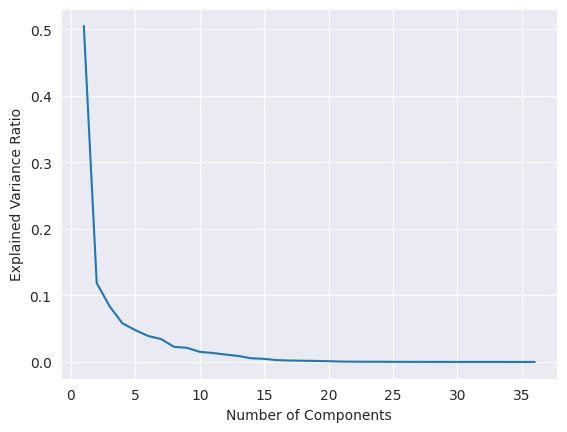

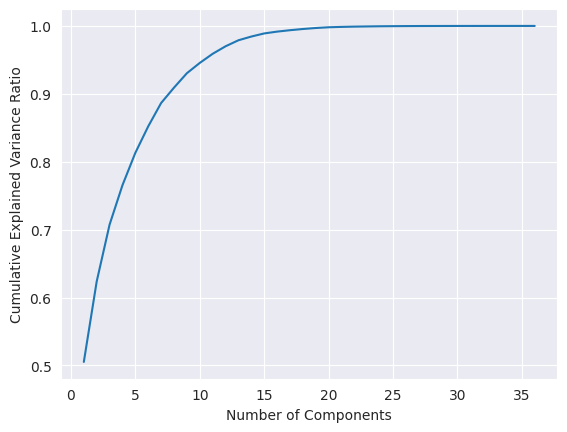

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df)  # X is your data
explained_var_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

cum_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


In [11]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# n_components = 8
# columns_to_keep = ['year', 'confID', label]
# df_to_keep = pd.DataFrame(df[columns_to_keep])

# df.drop(columns_to_keep, axis=1, inplace=True)

# custom_column_names = [f'PC{i + 1}' for i in range(n_components)]  # Create custom column names

# #Assuming 'X' is your data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)

# pca = PCA(n_components=n_components)  # Choose the number of components you want
# X_pca = pca.fit_transform(X_scaled)

# df_result = pd.DataFrame(data=X_pca, columns=custom_column_names)

# print(df_to_keep['year'].isna().sum())

# df_result['year'] = df_to_keep['year'].reset_index(drop=True)
# df_result['confID'] = df_to_keep['confID'].reset_index(drop=True)
# df_result[label] = df_to_keep[label].reset_index(drop=True)

# df = df_result
# # X_pca now contains the reduced-dimensional representation of your data
# print(df['year'].isna().sum())

In [12]:
print(df.columns)
print(df.isna().sum())

Index(['W_team_post', 'L_team_post', 'rank', 'o_fgm', 'o_fga', 'o_ftm',
       'o_fta', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_blk', 'o_pts',
       'd_fga', 'd_3pa', 'd_oreb', 'd_to', 'd_blk', 'won_team', 'lost_team',
       'awayW', 'awayL', 'confW', 'confL', 'attend', 'arena', 'won_coach',
       'lost_coach', 'post_wins', 'post_losses', 'CBE_Sum', 'award_player',
       'playersAge', 'playoff', 'year', 'confID'],
      dtype='object')
W_team_post     0
L_team_post     0
rank            0
o_fgm           0
o_fga           0
o_ftm           0
o_fta           0
o_oreb          0
o_dreb          0
o_reb           0
o_asts          0
o_blk           0
o_pts           0
d_fga           0
d_3pa           0
d_oreb          0
d_to            0
d_blk           0
won_team        0
lost_team       0
awayW           0
awayL           0
confW           0
confL           0
attend          0
arena           0
won_coach       0
lost_coach      0
post_wins       0
post_losses     0
CBE_Sum       

In [13]:
# corr_matrix = df.corr()
# fig = plt.figure(figsize=(30,30), dpi = 480)
# sn.heatmap(df.corr(), annot = True, fmt = '.2f')
# plt.show()

In [14]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf = DecisionTreeClassifier()
mlp = MLPClassifier()
svm = SVC(probability=True, kernel="linear")
bagging = BaggingClassifier()
ada_boost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()

svm_param_grid = {
    'kernel': ['linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],

}
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1, 0.5],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32],
}

clf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

rlf_param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

gdb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10, 20, 30, 40, 50],
}

bagging_param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

ada_boost_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

gradient_boosting_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['deviance', 'exponential'],
}

random_forest_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, \
    roc_curve
import seaborn as sns


def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        xticklabels=['No', 'Yes'],
        yticklabels=['No', 'Yes']
    )
    plt.ylabel("Prediction", fontsize=13)
    plt.xlabel("Actual", fontsize=13)
    plt.title("Confusion Matrix", fontsize=14)
    plt.show()


def roc_curve_plot(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()


def model_score(y_test, y_pred, y_prob):
    print("a", y_prob)
    print("b", y_pred)
    confusion_matrix_plot(y_test, y_pred)
    roc_curve_plot(y_test, y_prob)

    print(f"AUC: {round(roc_auc_score(y_test, y_prob) * 100, 2)}%")
    print(f"Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
    print(f"Precision: {round(precision_score(y_test, y_pred) * 100, 2)}%")
    print(f"Recall: {round(recall_score(y_test, y_pred) * 100, 2)}%")
    print(f"F1: {round(f1_score(y_test, y_pred) * 100, 2)}%")

/tmp/ipykernel_13754/441294272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
/home/daniel/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': True, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


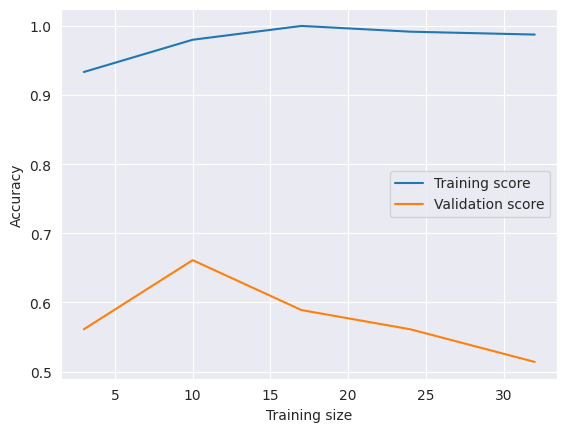

/tmp/ipykernel_13754/441294272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)


{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': True, 'estimator': None, 'max_features': 1.0, 'max_samples': 0.75, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


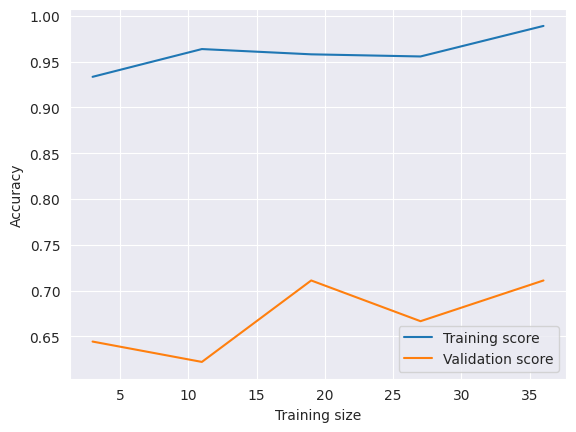

a [0.9  0.7  0.9  0.9  0.8  0.9  0.4  0.55 0.4  0.45 0.7  0.65 0.85]
b [1 0 1 1 0 1 0 1 0 0 1 1 1]


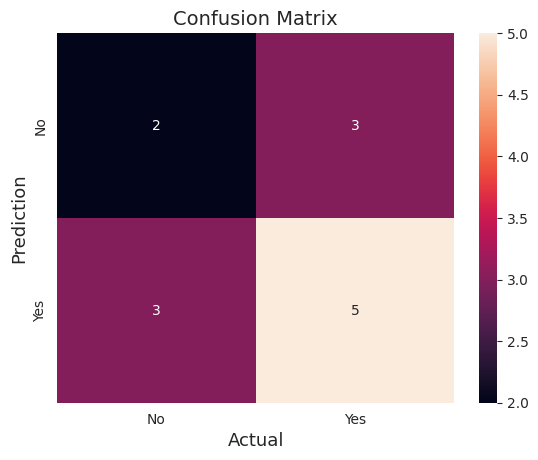

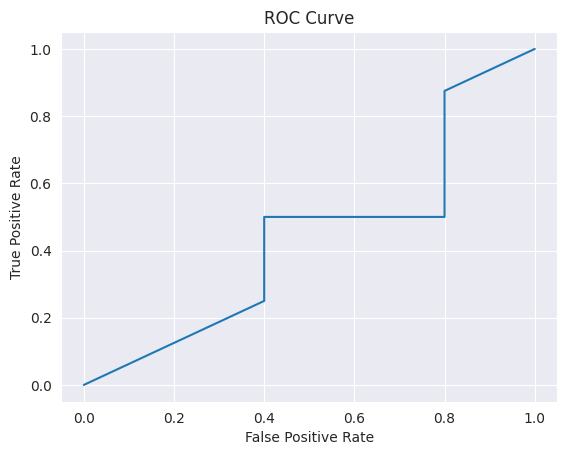

AUC: 43.75%
Accuracy: 53.85%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%


(array([0.9 , 0.7 , 0.9 , 0.9 , 0.8 , 0.9 , 0.4 , 0.55, 0.4 , 0.45, 0.7 ,
        0.65, 0.85]),
 array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]))

In [16]:
from sklearn.model_selection import learning_curve


def split_data(df):
    return df[df['confID'] == 0], df[df['confID'] == 1]


def train_model_validation(year, model, data, label, param_grid):
    data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
    train_data = data[data["year"] < year]
    test_data = data[data["year"] == year]

    X_train, X_val, y_train, y_val = train_test_split(train_data.drop([label], axis=1),
                                                      train_data[label], test_size=0.2, random_state=42)

    X_test, y_test = test_data.drop([label, 'sampleWeight'], axis=1), test_data[label]
    sample_weight = X_train['sampleWeight']
    model.fit(X_train.drop(['sampleWeight'], axis=1), y_train)
    grid_search = GridSearchCV(model, param_grid, cv=None)
    grid_search.fit(X_val, y_val)

    sample_weight = train_data["sampleWeight"]
    model.set_params(**grid_search.best_params_)

    model.fit(train_data.drop([label, "sampleWeight"], axis=1), train_data[label])

    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=None)

    print(model.get_params())

    if year == 8:
        plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
        plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
        plt.xlabel('Training size')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    return y_test, y_pred, y_prob


def train_evaluate_decision_tree_graph(model, data, param_grid):
    accuracy_scores = []

    data1, data2 = df[df['confID'] == 0], df[df['confID'] == 1]
    year = 8

    y_test1, y_pred1, y_prob1 = train_model_validation(year, model, data1, label, param_grid)
    y_test2, y_pred2, y_prob2 = train_model_validation(year, model, data2, label, param_grid)

    highest_probs = sorted([x[1] for x in y_prob1], reverse=True)[:4]
    for i in range(len(y_prob1)):
        if y_prob1[i][1] in highest_probs:
            y_pred1[i] = 1
        else:
            y_pred1[i] = 0

    highest_probs = sorted([x[1] for x in y_prob2], reverse=True)[:4]
    for i in range(len(y_prob2)):
        if y_prob2[i][1] in highest_probs:
            y_pred2[i] = 1
        else:
            y_pred2[i] = 0

    y_test = np.concatenate((y_test1, y_test2))
    y_pred = np.concatenate((y_pred1, y_pred2))
    y_prob = np.concatenate((y_prob1[:, 1], y_prob2[:, 1]))

    if year == 8:
        model_score(y_test, y_pred, y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    return y_prob, y_test


train_evaluate_decision_tree_graph(bagging, df, bagging_param_grid)

In [17]:
from sklearn.model_selection import learning_curve


def split_data(df):
    return df[df['confID'] == 0], df[df['confID'] == 1]


def train_model_validation(year, model, data, label, param_grid):
    data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
    train_data = data[data["year"] < year]
    test_data = data[data["year"] == year]

    X_train, X_val, y_train, y_val = train_test_split(train_data.drop([label], axis=1),
                                                      train_data[label], test_size=0.2, random_state=42)

    X_test, y_test = test_data.drop([label, 'sampleWeight'], axis=1), test_data[label]
    sample_weight = X_train['sampleWeight']
    model.fit(X_train.drop(['sampleWeight'], axis=1), y_train)
    grid_search = GridSearchCV(model, param_grid, cv=None)
    grid_search.fit(X_val, y_val)

    sample_weight = train_data["sampleWeight"]
    model.set_params(**grid_search.best_params_)

    model.fit(train_data.drop([label, "sampleWeight"], axis=1), train_data[label])

    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=None)

    print(model.get_params())

    if year == 8:
        plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
        plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
        plt.xlabel('Training size')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    return y_test, y_pred, y_prob


def train_evaluate_decision_tree_graph(model, data, param_grid):
    accuracy_scores = []

    data1, data2 = df[df['confID'] == 0], df[df['confID'] == 1]
    year = 8

    y_test1, y_pred1, y_prob1 = train_model_validation(year, model, data1, label, param_grid)
    y_test2, y_pred2, y_prob2 = train_model_validation(year, model, data2, label, param_grid)

    highest_probs = sorted([x[1] for x in y_prob1], reverse=True)[:4]
    for i in range(len(y_prob1)):
        if y_prob1[i][1] in highest_probs:
            y_pred1[i] = 1
        else:
            y_pred1[i] = 0

    highest_probs = sorted([x[1] for x in y_prob2], reverse=True)[:4]
    for i in range(len(y_prob2)):
        if y_prob2[i][1] in highest_probs:
            y_pred2[i] = 1
        else:
            y_pred2[i] = 0

    y_test = np.concatenate((y_test1, y_test2))
    y_pred = np.concatenate((y_pred1, y_pred2))
    y_prob = np.concatenate((y_prob1[:, 1], y_prob2[:, 1]))

    if year == 8:
        model_score(y_test, y_pred, y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    return y_prob, y_test


train_evaluate_decision_tree_graph(bagging, df, bagging_param_grid)

/tmp/ipykernel_13754/441294272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sampleWeight'] = data['year'].apply(lambda year_x: 2 ** (year - year_x - 1) if year > year_x else 1)
/home/daniel/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(

KeyboardInterrupt



 Model Score

In [ ]:
# coeff_log = lr.coef_
# importance_log = coeff_log[0]
# abs_importance_log = abs(importance_log)
# importance_list_log = list(zip(df.columns, importance_log, abs_importance_log))
# importance_list_log.sort(key=lambda x: x[2], reverse=True)
# for i in range(len(importance_list_log)):
#     print(importance_list_log[i][1])
#     if importance_list_log[i][1] < 0 and importance_list_log[i][0] not in ['year', 'confID']:
#         df.drop(importance_list_log[i][0], axis=1, inplace=True)

# k = train_evaluate_decision_tree_graph(lr, df, lr_param_grid)
# print(df.shape)




In [ ]:
print(k)
print(df[df['year'] == 8])